In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pandas as pd

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10)

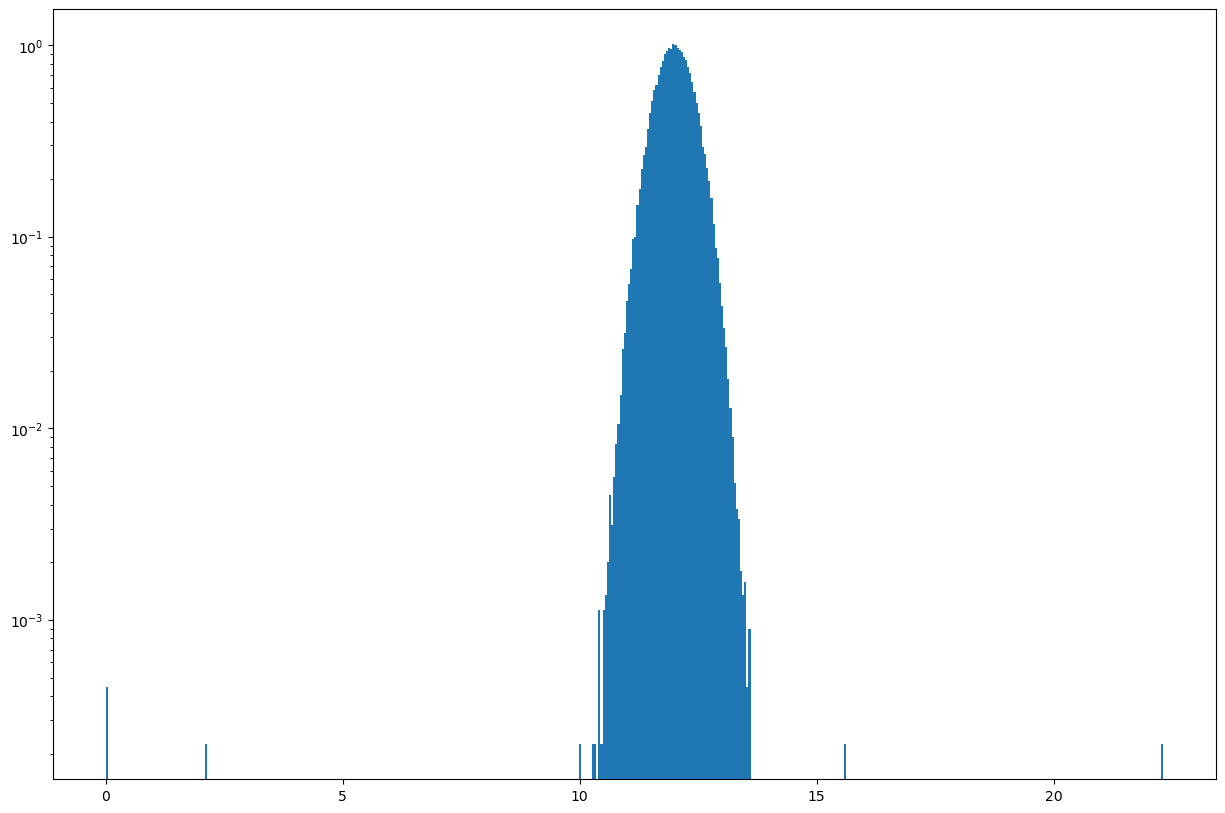

In [2]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(d,500, density=True)
plt.tick_params(labelsize = 10)
plt.yscale('log')
#x = np.linspace(4.95,5.05,1000)
#ax.plot(x,stats.norm.pdf(x,loc = 5., scale = 0.01),linewidth = 8,alpha = 0.7)
plt.show()

### A) So our goal is to identify bad data and throw it out.

1. Start by exploring the data you have created with appropriate plots
2. State the statistical question in words. Be very clear, and describe why you have chosen this statistical question.
3. Restate your question in math. Be very clear.
4. Apply your statistical test and construct a truth table.

---

1. see above
2. What value of sigma will make a good threshold to eliminate as many bad datapoints as possible while retaining as many true datapoints as possible? 
3. I can calculate how many good data points are thrown out and how many bad data points are kept by simply setting a threshold of datapoints I want to keep, and checking how many datapoints for each category are outside that threshold. This is done by first converting a Sigma probability into a value for this distribution using a PPF, and then taking that value and removing points from $\pm$ the difference between that and the mean of the distribution.
4.

In [3]:
def truth_table(sigma):
    prob = stats.norm.cdf(sigma)
    threshold = stats.norm.ppf(prob,loc = 12, scale = 0.4)
    
    threshold = threshold - 12
    
    np.random.seed(seed=153954)

    true_data = stats.norm.rvs(loc = 12., scale = 0.4, size = 100000)
    false_data = [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7]
    
    throw_away_true = 0
    for val in true_data:
        if val <= (12-threshold) or val >= (12+threshold):
            throw_away_true += 1
    
    throw_away_false = 0
    for val in false_data:
        if val <= (12-threshold) or val >= (12+threshold):
                throw_away_false += 1
                
    good_tossed = throw_away_true
    good_kept = len(true_data) - good_tossed
    
    bad_tossed = throw_away_false
    bad_kept = len(false_data) - bad_tossed
    
    data = ['Your Test Good',good_kept,bad_tossed],['Your Test Bad',good_tossed,bad_kept]
    table = pd.DataFrame(data=data,columns=['','True T','Bad T'])
    
    return table

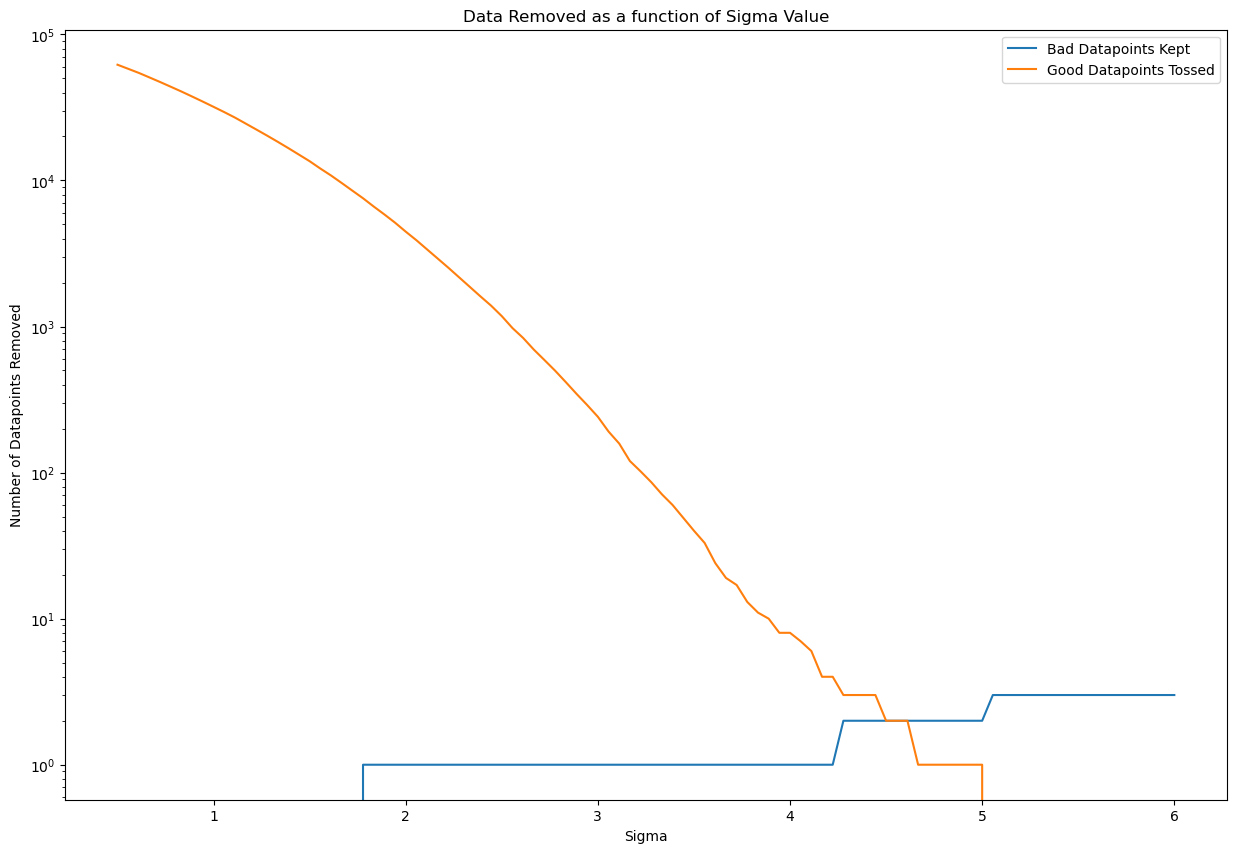

In [4]:
sigmas = np.linspace(0.5,6,100)
Bad_Kept = []
Good_Tossed = []
for i in sigmas:
    table = truth_table(i)
    Bad_Kept.append(table['Bad T'][1])
    Good_Tossed.append(table['True T'][1])
    
plt.plot(sigmas,Bad_Kept,label='Bad Datapoints Kept')
plt.plot(sigmas,Good_Tossed,label='Good Datapoints Tossed')

plt.title('Data Removed as a function of Sigma Value')
plt.xlabel('Sigma')
plt.ylabel('Number of Datapoints Removed')
plt.yscale('log')

plt.legend();

From this, I see that a sigma value of around 4.2 will remove all but 1 of the 'bad' datapoints, while removing less than 10 of the true datapoints. If I move this up to sigma of around 4.8, I can remove all but 2 of the 'bad' datapoints without removing any of my true datapoints. The truth table for this looks like this:

In [5]:
truth_table(4.2)

,,True T,Bad T
0,Your Test Good,99996,7
1,Your Test Bad,4,1


### B) How does the number of omissions, where you threw out good data, depend on the statistical threshold you chose and is it a predictable quantity?

The number of omissions depends on the distribution and goes down as you choose a more unlikely statistical threshold. This is a predictable quantity if you know the distribution, as it is fully dependent on probability. It can be approximated as the percentage of data outside the threshold times the number of datapoints. Here I show that for a Sigma value of 4.2, the number of expected datapoints ommited is less than 1; and as shown above, for this scenario, this would remove all but 1 of the 'bad' datapoints.

In [6]:
datapoints = 10000

prob = stats.norm.cdf(4.2)
(1-prob) * datapoints

0.13345749015902797

### C) Are there mistakes of commission (bad data getting in)? If yes, are they avoidable and how do they depend on your statistical threshold?

Mistakes of comission in this scenario are difficult to avoid without throwing out a substantial portion of our good data. Mistakes of comission are less avoidable than omissions, because (i don't think) we know the distribution of mistakes beforehand, so it is hard to predict how many and where they will be. The number does depend on the statistical threshold though, because things that are statistically unlikely to be from our distribution are more likely to be mistakes of commission.

# Problem 2

1. What is the question in words?
2. Translate the question to math, describing both the expected background pdf() and the integral you need to do.
3. Convert to sigma.

---

1. What distance in arcseconds does an object need to move to determine that it is an asteroid moving, and not random variation in the position of a star due to atmospheric effects?
2. The magnitude of two Gaussians in the same as a Rayleigh distribution with $\sigma_{Rayleigh} = \sqrt{\sigma_{gaussian}}$ . So I want to know where the Rayleigh distribution has a 5 sigma probability.
3. What distance in arcseconds represents a 5 sigma detection of motion?

In [7]:
prob = stats.norm.cdf(5)
prob

0.9999997133484281

In [8]:
stats.rayleigh.ppf(prob)

5.489079776034238

5-sigma for this 2 dimensional Gaussian is at an amplitude of ~5.5 arcseconds. So a measurement at 5.5 arcseconds or greater would be likely to be movement of an asteroid and not an atmospheric anomaly.

# Problem 3

1. What is the question in words?
2. Translate the question to math, describing both the expected background pdf() and the integral you need to do.
3. Convert to sigma.

---

1. What is that statistical significance of measuring 6800 cosmic rays from a patch of sky the size of the moon over 15 days? What is the liklihood this would happen for a patch of sky that did not contain the moon?

2. Since this is a time interval based discrete distribution, I take it to be Poisson distributed, with $\lambda = 1$ per minute for any random moment of time. Given 15, 8 hour observing nights, this cooresponds to 7,200 seconds of observation. The probability distribution for this observing interval would thus be a Poisson distribution with $\lambda = 1$, convolved 7,200 times. However, instead I know from Lab 2 that this is equivalent to a Poisson distribution with $\lambda = 7200$, so I do not need to make this unnecessary calculation. 

    Because our measurement (6800 cosmic rays from the patch of moon sky) is less than the expected 7200, we need to integrate from -infinity to 6800 in our normalized probability distribution to get the percentage likelihood of getting a measurement 6800 or less, and then convert this to sigma. This can be done simply using CDF.

3. 

In [9]:
prob = stats.poisson.cdf(k=6800,mu=7200)
prob

1.0133280183917768e-06

In [10]:
stats.norm.ppf(prob)

-4.750747965777188

So while this would be an unlikely result for a non-moon patch of sky, it is not quite a 5 sigma measurement, but a 4.75 sigma measurement. The negative sign in the sigma is indicating that this is to the left of the mean of the normal distribution.